In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# 建構CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
# 編譯模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# 將數據進行 reshape, 以符合CNN 輸入的要求
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [7]:
# 訓練模型
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 64s 33ms/step - loss: 0.1463 - accuracy: 0.9543 - val_loss: 0.0441 - val_accuracy: 0.9859
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0472 - accuracy: 0.9850 - val_loss: 0.0345 - val_accuracy: 0.9887
Epoch 3/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0333 - accuracy: 0.9900 - val_loss: 0.0444 - val_accuracy: 0.9856
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0253 - val_accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0278 - val_accuracy: 0.9902


In [8]:
!dir
#他的資料夾位置會是在 content 底下這樣。

7.png  drive  sample_data


In [9]:
#from matplotlib import Image
from PIL import Image
import numpy as np
image = Image.open("7.png").convert('L') ## 將圖像轉換成灰階
image = image.resize((28,28))      ### 調整大小為 28 *28 像素
image = np.array(image) /255.0 #標準化像素質
image = image.reshape(1,28,28,1) #添加批次維度

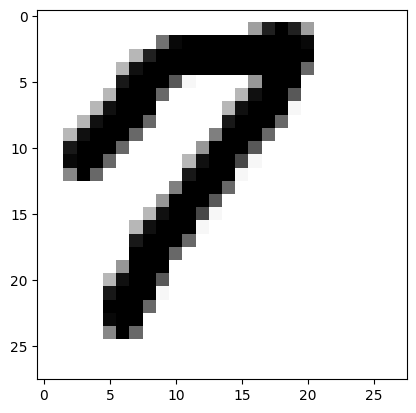

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image12 = img.imread('7.png')                       # 讀取圖片
plt.imshow(image12)                                    # 在圖表中繪製圖片
plt.show()

In [11]:
# 進行預測
predictions = model.predict(image)
predicted_label = np.argmax(predictions)

print("预测结果:", predicted_label)

1/1 [==============================] - 0s 112ms/step
预测结果: 7
